# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
plt.style.use("ggplot") # ggplot provides a vizualization style I find usuful but if its not allow please comment it out. 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Set the API base URL
unit = "metric"

url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={unit}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | winnemucca
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | dalnegorsk
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | kerema
Processing Record 11 of Set 1 | antalya
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | gao
Processing Record 19 of Set 1 | timaru
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | udachny
Processing 

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,winnemucca,40.9730,-117.7357,10.25,48,0,3.63,US,1715273070
1,lihue,21.9789,-159.3672,20.77,86,75,2.06,US,1715272805
2,puerto natales,-51.7236,-72.4875,1.25,93,75,1.03,CL,1715273070
3,port mathurin,-19.6833,63.4167,25.61,75,100,11.24,MU,1715273070
4,bethel,41.3712,-73.4140,19.70,58,0,6.17,US,1715273071


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,winnemucca,40.9730,-117.7357,10.25,48,0,3.63,US,1715273070
1,lihue,21.9789,-159.3672,20.77,86,75,2.06,US,1715272805
2,puerto natales,-51.7236,-72.4875,1.25,93,75,1.03,CL,1715273070
3,port mathurin,-19.6833,63.4167,25.61,75,100,11.24,MU,1715273070
4,bethel,41.3712,-73.4140,19.70,58,0,6.17,US,1715273071


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

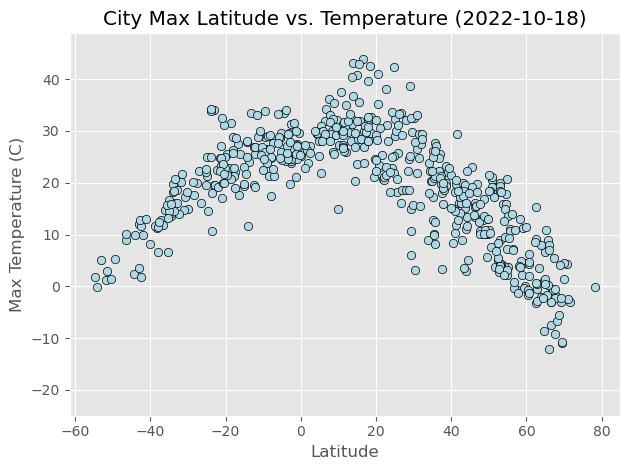

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-25,max(city_data_df["Max Temp"])+5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

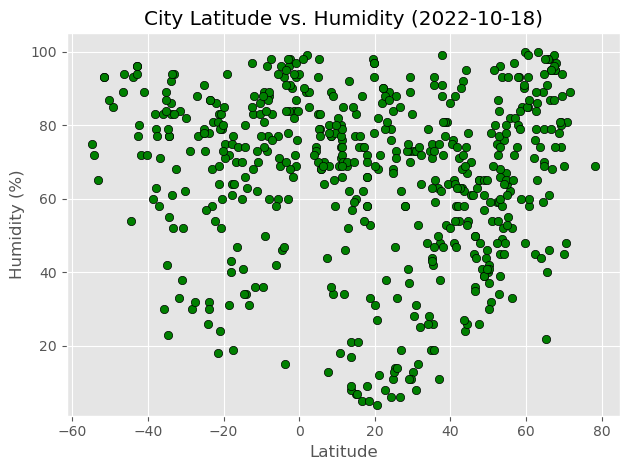

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(1,max(city_data_df["Humidity"])+5)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

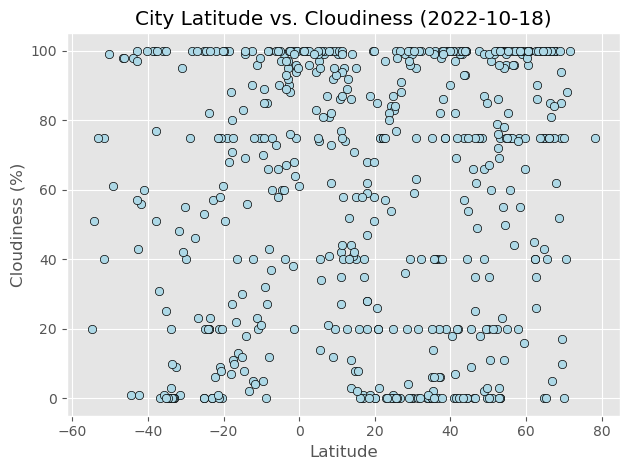

In [76]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-5,max(city_data_df["Cloudiness"])+5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

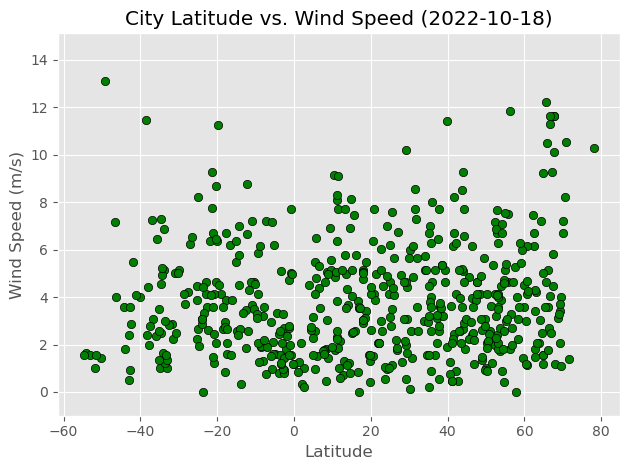

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-1,max(city_data_df["Wind Speed"])+2)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    return regress_values, line_eq, rvalue


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,1.25,93,75,1.03,CL,1715273070
3,port mathurin,-19.6833,63.4167,25.61,75,100,11.24,MU,1715273070
5,blackmans bay,-43.0167,147.3167,12.07,96,100,0.52,AU,1715273071
6,port elizabeth,-33.9180,25.5701,18.16,92,20,5.14,ZA,1715273022
9,kerema,-7.9631,145.7785,24.73,88,100,1.93,PG,1715273071


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8543866023765353


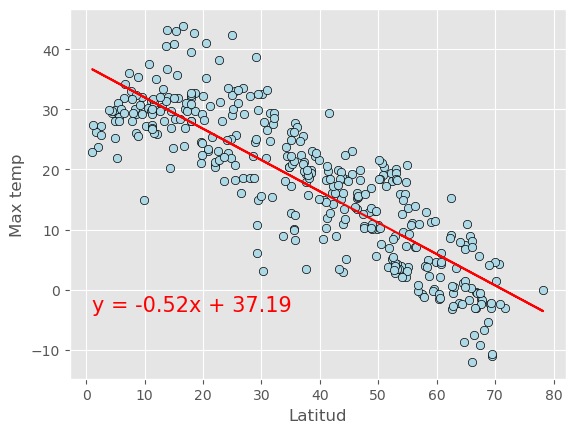

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
    
regress_values_north, line_eq_north, rvalue_north = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_north}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_north,"r-")
plt.annotate(line_eq_north, (x_values.min(), regress_values_north.min()), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Max temp')
plt.show()



The r-value is: 0.8111097275638317


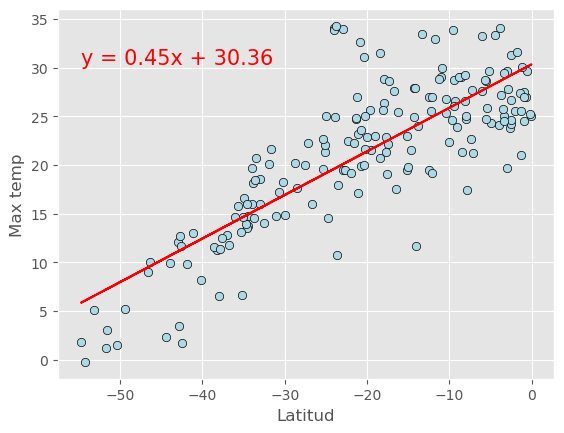

In [119]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
    
regress_values_south, line_eq_south, rvalue_south = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_south}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_south,"r-")
plt.annotate(line_eq_south, (x_values.min(), regress_values_south.max()), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Max temp')
plt.show()


**Discussion about the linear relationship:** The two visualizations depict linear regression analyses for the Northern and Southern Hemispheres. In the Northern Hemisphere, the negative r-value (-0.854) indicates a strong negative linear relationship between latitude and maximum temperature. This suggests that as latitude increases (moving northward), the temperature tends to decrease. Conversely, in the Southern Hemisphere, the positive r-value indicates a strong positive linear relationship, meaning that as latitude approaches the equator, the temperature tends to increase. In summary, these findings align with expectations, showing how temperature changes with latitude in both hemispheres

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13505353461668884


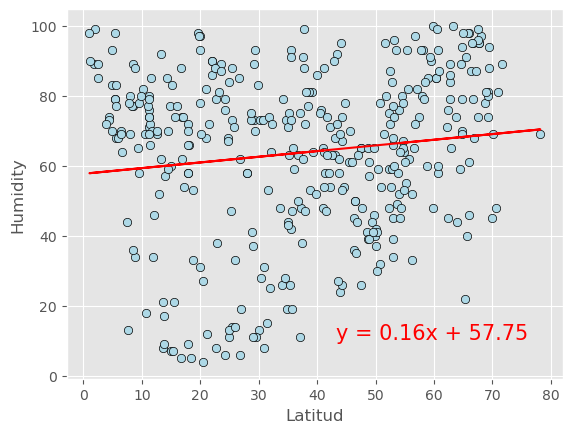

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
    
regress_values_north, line_eq_north, rvalue_north = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_north}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_north,"r-")
plt.annotate(line_eq_north,(x_values.max()-35, regress_values_north.max()-60), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.01781693140334809


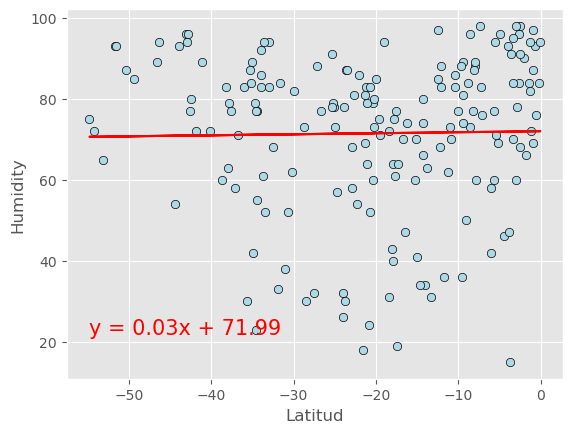

In [150]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
    
regress_values_south, line_eq_south, rvalue_south = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_south}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_south,"r-")
plt.annotate(line_eq_south, (x_values.min(), regress_values_south.max()-50), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Both visualizations represent linear regression analyses for humidity in the Northern and Southern Hemispheres. The r-values are close to zero, indicating a weak linear relationship between latitude and humidity. Specifically, in the Southern Hemisphere, the r-value is 0.0178, and in the Northern Hemisphere, it is 0.1351, suggesting a slightly positive trend where humidity increases with latitude. However, this relationship is barely noticeable. Overall, these findings suggest that latitude has minimal impact on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08364828079713588


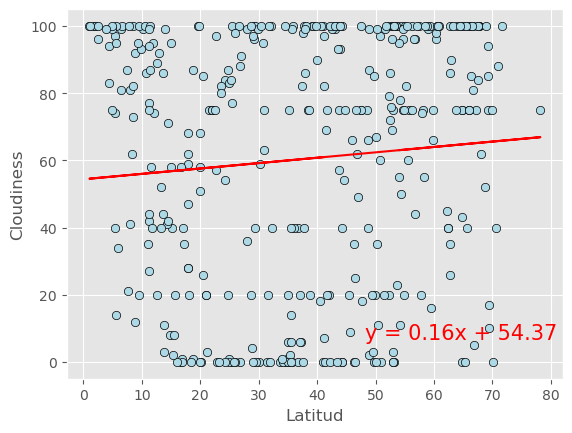

In [155]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
    
regress_values_north, line_eq_north, rvalue_north = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_north}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_north,"r-")
plt.annotate(line_eq_north,(x_values.max()-30, regress_values_north.max()-60), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
plt.show()


The r-value is: 0.24385972962302915


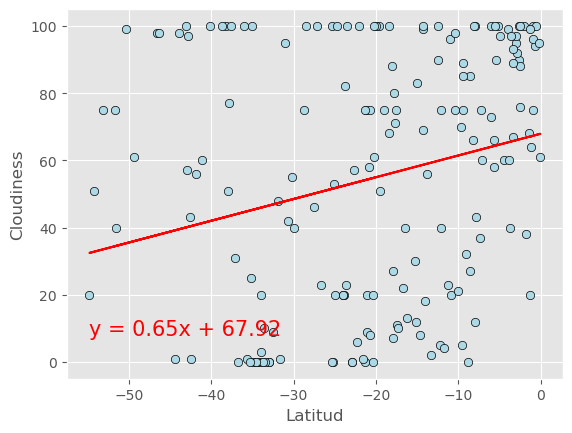

In [153]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
    
regress_values_south, line_eq_south, rvalue_south = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_south}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_south,"r-")
plt.annotate(line_eq_south, (x_values.min(), regress_values_south.max()-60), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Cloudiness shows weak positive correlations with latitude in both hemispheres, with slightly stronger effects in the Southern (r = 0.24) than in the Northern (r = 0.08) Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16873230090062025


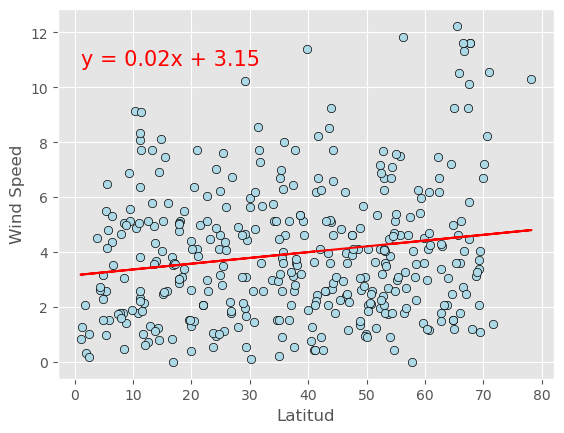

In [163]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
    
regress_values_north, line_eq_north, rvalue_north = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_north}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_north,"r-")
plt.annotate(line_eq_north,(x_values.min(), regress_values_north.max()+6), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.10245384660237034


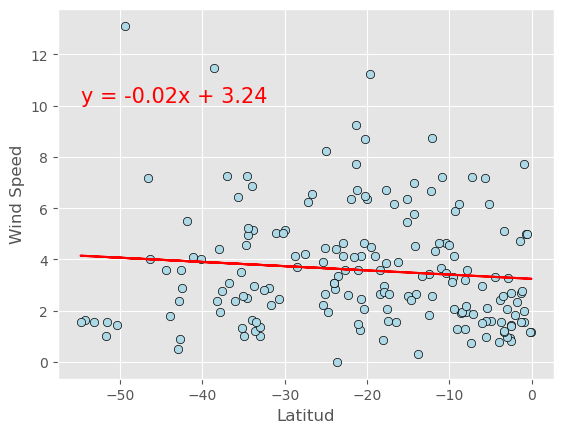

In [165]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
    
regress_values_south, line_eq_south, rvalue_south = linear_regression(x_values, y_values)

# Print regression line equation and r-value
print(f"The r-value is: {rvalue_south}")

plt.scatter(x_values,y_values, color="lightblue", edgecolors="black")
plt.plot(x_values,regress_values_south,"r-")
plt.annotate(line_eq_south, (x_values.min(), regress_values_south.max()+6), fontsize=15, color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The analysis indicates that there is a weak positive correlation between wind speed and latitude in the Northern Hemisphere, suggesting that wind speed tends to increase slightly as latitude increases. Conversely, in the Southern Hemisphere, there is a weak negative correlation, indicating that wind speed tends to decrease slightly as latitude increases towards the equator (0).